In [371]:
#====== importing libraries ==========
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from statsmodels.multivariate.pca import PCA

#importing ploting libraries
import matplotlib.pyplot as plt

In [372]:
#========= importing file and dropping unnecessary columns ==================
df = pd.read_csv("Week12_ExamExcel_BhumikaMittal.csv")
y = df['NIFTY50']
df.drop(['Date', 'NIFTY50'], axis=1, inplace=True)
x = df
#=========== standard fit the data ===========
x_std = StandardScaler().fit_transform(x)

#Obtain the variance and covariance matrix
cov_matrix = np.cov(x_std.T)
print('Covariance matrix \n%s' %cov_matrix)

Covariance matrix 
[[1.00404858 0.36302211 0.88188057 0.43150146 0.56749821 0.45021471
  0.61848332 0.33364993]
 [0.36302211 1.00404858 0.37337447 0.32527626 0.42627485 0.37216665
  0.36183084 0.24390565]
 [0.88188057 0.37337447 1.00404858 0.45358662 0.53172333 0.45626232
  0.63093292 0.39752788]
 [0.43150146 0.32527626 0.45358662 1.00404858 0.38653177 0.74395248
  0.33331691 0.28350723]
 [0.56749821 0.42627485 0.53172333 0.38653177 1.00404858 0.38073753
  0.59343943 0.37807737]
 [0.45021471 0.37216665 0.45626232 0.74395248 0.38073753 1.00404858
  0.32896752 0.32359248]
 [0.61848332 0.36183084 0.63093292 0.33331691 0.59343943 0.32896752
  1.00404858 0.40498003]
 [0.33364993 0.24390565 0.39752788 0.28350723 0.37807737 0.32359248
  0.40498003 1.00404858]]


In [373]:
#Obtain the eigenvalues and eigenvectors
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.41102204 -0.2313758   0.6952562   0.03556577 -0.22618199 -0.26952577
   0.40981249  0.03363477]
 [-0.28446406  0.07892133  0.02099503 -0.07072112  0.05482058 -0.36132059
  -0.41389527 -0.77623592]
 [-0.41632307 -0.21722928 -0.70494857 -0.07917625 -0.1276903  -0.36249713
   0.34605304  0.09382695]
 [-0.33452321  0.5968136   0.05855408 -0.68096543  0.10026191  0.16754073
   0.11742269  0.11337911]
 [-0.36708868 -0.20412648 -0.08743896  0.03521516 -0.5190217   0.70164249
  -0.14870773 -0.17576378]
 [-0.34205696  0.59328782 -0.04746344  0.71830856  0.04877662  0.0194678
   0.04235815  0.0907429 ]
 [-0.37129944 -0.36219103  0.02982424  0.06035503  0.79924345  0.29576496
   0.00190367  0.01231021]
 [-0.27439036 -0.10964142  0.07077518 -0.05385895 -0.0944795  -0.23910485
  -0.70943062  0.57912819]]

Eigenvalues 
[4.16269988 1.06766642 0.11556621 0.25617411 0.38168082 0.5160008
 0.77161835 0.76098209]


In [374]:
#Create eigen pairs
eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eigen_pairs

[(4.162699875866,
  array([-0.41102204, -0.28446406, -0.41632307, -0.33452321, -0.36708868,
         -0.34205696, -0.37129944, -0.27439036])),
 (1.0676664157252653,
  array([-0.2313758 ,  0.07892133, -0.21722928,  0.5968136 , -0.20412648,
          0.59328782, -0.36219103, -0.10964142])),
 (0.11556620790497675,
  array([ 0.6952562 ,  0.02099503, -0.70494857,  0.05855408, -0.08743896,
         -0.04746344,  0.02982424,  0.07077518])),
 (0.25617410605137897,
  array([ 0.03556577, -0.07072112, -0.07917625, -0.68096543,  0.03521516,
          0.71830856,  0.06035503, -0.05385895])),
 (0.3816808171147624,
  array([-0.22618199,  0.05482058, -0.1276903 ,  0.10026191, -0.5190217 ,
          0.04877662,  0.79924345, -0.0944795 ])),
 (0.5160007999589653,
  array([-0.26952577, -0.36132059, -0.36249713,  0.16754073,  0.70164249,
          0.0194678 ,  0.29576496, -0.23910485])),
 (0.7716183464279476,
  array([ 0.40981249, -0.41389527,  0.34605304,  0.11742269, -0.14870773,
          0.04235815,  0

In [375]:
#Compute the cumlative variance
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained",cum_var_exp)

#we observe that only first 4 components contribute to more than 80% of the information. Hence, rest can be reduced in dimension reduction.

Cumulative Variance Explained [ 51.82393495  65.11595131  74.72228859  84.19620882  90.62021072
  95.37198299  98.56124731 100.        ]


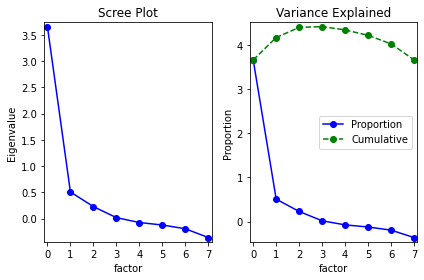

In [376]:
#make a scree plot
from statsmodels.multivariate.factor import Factor
model = Factor(df).fit()
model.plot_scree()
plt.show()

In [377]:
#Extract the PCA components
pc = PCA(df, ncomp=8, standardize=True, demean = True)
pc

Principal Component Analysis(nobs: 248, nvar: 8, transformation: Standardize (Correlation), normalization: True, number of components: 8, SVD, id: 0x7f7cd668dca0)

In [378]:
#Compute the loadings on the variables
df_comp = pc.loadings.T
df_comp

,HDFC Bank,RIL,HDFC,Infosys,ICICI Bank,TCS,Kotak Bank,HUL
comp_0,0.411022,0.284464,0.416323,0.334523,0.367089,0.342057,0.371299,0.274390
comp_1,-0.231376,0.078921,-0.217229,0.596814,-0.204126,0.593288,-0.362191,-0.109641
comp_2,0.409812,-0.413895,0.346053,0.117423,-0.148708,0.042358,0.001904,-0.709431
comp_3,-0.033635,0.776236,-0.093827,-0.113379,0.175764,-0.090743,-0.012310,-0.579128
comp_4,-0.269526,-0.361321,-0.362497,0.167541,0.701642,0.019468,0.295765,-0.239105
comp_5,-0.226182,0.054821,-0.127690,0.100262,-0.519022,0.048777,0.799243,-0.094479
comp_6,0.035566,-0.070721,-0.079176,-0.680965,0.035215,0.718309,0.060355,-0.053859
comp_7,-0.695256,-0.020995,0.704949,-0.058554,0.087439,0.047463,-0.029824,-0.070775


The equations for the PCs:

PC0 = 0.411022(HDFC Bank) + 0.284464(RIL) + 0.416323(HDFC) + 0.334523(Infosys)

PC1 = -0.231376(HDFC Bank)+0.078921(RIL)-0.217229(HDFC)+0.596814(Infosys)

PC2 = 0.409812(HDFC Bank)-0.413895(RIL)+0.346053(HDFC)+0.117423(Infosys)

PC3 = -0.033635(HDFC Bank)+0.776236(RIL)-0.093827(HDFC)-0.113379(Infosys)

In [379]:
#Compute the scores
scores = pd.DataFrame(pc.factors)
scores.head()

,comp_0,comp_1,comp_2,comp_3,comp_4,comp_5,comp_6,comp_7
0,-0.080669,-0.088225,0.061961,0.000879,-0.022261,-0.055580,-0.058733,0.057721
1,0.094667,-0.037107,0.008231,0.012011,0.108699,0.004502,0.045785,0.054374
2,0.073401,0.052319,0.003684,0.019873,0.015031,-0.148873,-0.061777,-0.029904
3,-0.012667,0.022515,-0.062486,0.057293,0.013285,0.021625,-0.086482,0.106854
4,-0.013443,0.048202,-0.015558,0.016114,0.026435,-0.045652,0.079718,-0.058182


In [380]:
database = pd.read_csv("Week12_ExamExcel_BhumikaMittal.csv")
data = database.iloc[:,0:17]
data = data.drop(['Date', 'NIFTY50'], axis=1)
x = data
y = database['NIFTY50']

In [381]:
from sklearn.decomposition import PCA

pca = PCA()
x_red = pca.fit_transform(scale(X))
x_red

array([[ 2.58666523,  1.43271104,  0.85539286, ..., -0.53965896,
         0.46719283,  0.30839057],
       [-3.03554516,  0.60259747,  0.11363601, ...,  0.04371623,
        -0.36419907,  0.29050389],
       [-2.35363661, -0.84962548,  0.05085591, ..., -1.44548746,
         0.49140591, -0.15977156],
       ...,
       [-1.40965488,  0.64498282, -0.77961045, ...,  0.07222045,
         0.31269893,  0.05454751],
       [-0.28853615, -1.79149828,  1.12793415, ...,  0.35416942,
        -0.65747534, -0.173476  ],
       [ 1.79368632,  0.14449267,  0.50208306, ...,  0.62753956,
        -0.02870569, -0.1822275 ]])

In [385]:
#ref - https://analyticsindiamag.com/a-hands-on-guide-to-principal-component-regression-in-python/

# Dividing the data into Training and Test with 80:20 ratio
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

x_train = pca.fit_transform(scale(x_train))
x_test = pca.transform(scale(x_test))[:, 0:4]

lm = LinearRegression()
pcr = lm.fit(x_train[:,0:4], y_train)
y_pred = pcr.predict(x_test)

print("Predicted daily returns for NIFTY 50: ",y_pred)
#print("Daily returns for NIFTY 50: ",y_test)

Predicted daily returns for NIFTY 50:  [-217.68071995  -42.13879424 -273.61360089  107.67723196  219.50749441
   10.52696309 -296.67422258 -139.64631834 -244.94563885   98.84485337
  334.1368636   -42.41205946 -156.65112715   18.83977601  208.51864021
  143.3690247    80.19541241   98.00123368  437.09393122  104.94079494
 -144.50514042  114.65330452 -447.96484088    4.27982654   50.54038238
   68.82307712 -249.82076845 -282.25663563   46.74264564  190.01059014
  170.25040191  101.37068917  122.53583195  195.59893227  125.49148832
  -12.53227466 -241.60928925 -108.60363354  -96.63059292   39.35830408
   33.53235282   63.34308099 -199.12866499 -294.66558764   86.72988703
  282.018624    258.0004611   -74.65215437  -17.50558641   48.55408893]


In [383]:
#lower the accuracy, better the predicting accuracy of the model
print("Accuracy: ", (np.sqrt(mean_squared_error(y_test, y_pred))))

Accuracy:  39.99165684035221


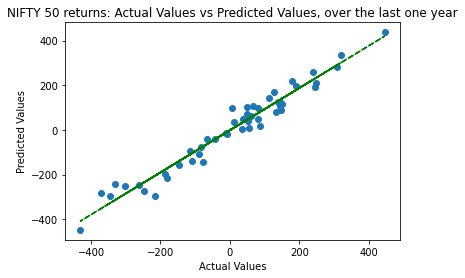

In [384]:
#Scatter Plot for predicted and actual NIFTY50 returns over the last one year
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.title('NIFTY 50 returns: Actual Values vs Predicted Values, over the last one year')

# Trend line 
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test),"g--")

#This determines the accuracy of the model and also points out the outliers